# Livrable Final

## Table des matières
- Introduction
1. Cadre d'étude et Contraintes
2. Modélisation du problème
3. Implémentation
4. Exploitation
- Conclusion

 ## Introduction

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrations et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.   Notre équipe fait partie de la structure CesiCDP déjà implantée dans le domaine et nous avons été mobilisé pour répondre à cet appel. CesiCDP souhaite que l’on oriente l’étude sur la gestion de tournées de livraison. Le problème algorithmique consiste a calculer, sur un réseau routier quelconque, une tournée permettant de relier entre elles un sous-ensemble de villes avec pour but de revenir au point de départ en un minimum de temps. Une méthode algorithme permettrant de répondre a ce problème est attendu. Il est aussi demandé d’ajouter des contraintes supplémentaires afin de rendre le model plus réaliste possible.


## 1.Cadre d'étude et Contraintes

Afin de répondre à l’appel d’offre de l’ADEME, nous nous sommes défini un environnement clair.

Notre étude sur la **gestion de tournées de livraison** concerne la **distribution d’un réseau de villes en fonction de la fluctuation de la circulation**. Nous cherchons donc à déterminer **l’itinéraire le plus rapide** (en temps) nécessaire pour livrer chaque ville à l’aide d’un camion qui débutera l’itinéraire et le terminera à sa ville de dépôt. 

L’itinéraire dépendra donc du nombre de villes devant être livrées et du temps variable nécessaire pour le transit du camion entre chaque ville.

Nous avons donc établi les contraintes suivantes :
1.	Le camion doit **commencer et terminer** son itinéraire **depuis la même ville prédéfinie** ;
2.	Le camion doit **se rendre dans chaque ville devant être livré** ;
3.	**Le temps nécessaire pour utiliser une route** séparant deux villes **varie en fonction de la circulation** (on note également qu’à un même instant, le temps nécessaire pour se rendre à une ville B depuis une ville A n’est **pas identique** à se rendre à une ville A depuis une ville B).

Pareillement, nous avons établi les données nécessaires à la résolution de notre problème :
1.	Une **liste de villes** étant pouvant être une ville entrepôt, des villes à livrer ou des villes sans importance pour notre étude ;
2.	Une **carte** déterminant les positions des villes ;
3.	Les **relevées de la circulation** entre les différentes villes.

![EtudeAlgoPV](../Stat-Image/Why-is-Travelling-Salesman-Problem-challenging-to-solve_.webp)

## 2. Modélisation du problème

Avant de chercher des solutions à notre problème, nous avons commencé par rechercher **son domaine de définition**. Cela nous a permis de déterminer si notre algorithme peut obtenir **une solution dans un temps satisfaisant**.

Cependant, **le temps satisfaisant dépend de la taille du jeu de données**. En effet, plus le nombre de possibilité sera élevé, plus le temps d'analyse de notre algorithme sera élevé.  
C'est pourquoi on dit qu'**un algorithme non-déterministe est exécutable en temps polynomial** si, pour toutes constantes $c∈\mathbb{R}^*$, $k∈\mathbb{R}^*$ et $n∈\mathbb{N}$ indépendantes, avec $n$ présentant la taille des données en entrée, il s'exécute en moins de $c\times n^k$ opérations élémentaires.

Ainsi, si notre problème est soluble dans un temps polynomial, nous pouvons donc proposer un algorithme non-déterministe pour trouver une solution dans un temps satisfaisant.

C'est pourquoi, nous avons donc tout d'abord réalisé une modélisation formelle de notre problème puis nous avons déterminé si notre problème est soluble dans un temps polynomial.

### 2.1 Modélisation formelle de notre problème

Afin de définir notre problème, nous avons réalisé une **modélisation formelle** afin d’en abstraire le contexte.

Données :
* Un **graphe orienté complet $G$**$=(V,A,ω(t))$ avec 
	* $V$ un ensemble de sommets tel que $V=\left\{x_1,x_2,…,x_i,…,x_j,…,x_m\right\}$ avec $x_i$ la $i$-ième sommet et $m$ le nombre de sommets, 
	* $A⊆\left\{(x_i,x_j)|(x_i,x_j)∈V^2 ⋀[x_i≠x_j]\right\}$ un ensemble de flèches d’origine $x_i$ et d’extrémité $x_j$ qui sont des couples de sommets distincts,
	* $ω(t) ∶ A → \mathbb{R}^+$ une fonction de coût sur les arcs variant en fonction de l’instant $t$ où l’arc est utilisé,
	* $t∈R$ un instant donné avec $t=0$ le début de la modélisation.
* Un **ensemble de sommets $L$** tel que $L∈V$
* Un **sommet $D$** tel que $D∈V$

Problème :  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">Variante 1</span> (Problème de décision) :  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Existe-t-il un **circuit $C_{TD-TSP}$** de **coût inférieur à $k∈\mathbb{R}^+$** **passant par chaque sommet $L$** et dont le **point de départ est le sommet $D$** ?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:orange">Variante 2</span> (Problème d’optimisation) :  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Quel est **le plus petit $k$** tel que le **circuit $C_{TD-TSP}$** de coût $k∈\mathbb{R}^+$ **passe par chaque sommet $L$** et utilise le **sommet $D$ comme point de départ** ?

&nbsp;  

Soit la modélisation de notre problème à un instant $t$ pour $V=\left\{1, 2, 3, 4, 5, 6\right\}$ 
* avec $L=\left\{1, 2, 3, 5, 6\right\}$
* avec $D = \left\{4\right\}$ 
* avec en bleu une solution du problème

![EtudeAlgoPV](../Stat-Image/Graphe.png)

### 2.2 Preuve de résolution

L'objectif de cette partie est de déterminer si **notre problème est soluble en temps polynomial par un algorithme non-déterministe**.

Un problème est soluble en temps polynomial si nous pouvons rattacher **notre problème à une classe de complexité de NP**.  
Pour déterminer que notre problème est d'une classe de complexité de NP, nous devons déterminer si :
* le problème de décision (ici la <span style="color:green">Variante 1</span>) admet un algorithme de certificat qui est soluble en temps polynomial ;
* le problème est réduit dans un autre problème dont on connaît la classe de complexité.

Nous avons donc d'abord réalisé un algorithme de certificat puis déterminer si notre problème est soluble en temps polynomial.

#### 2.2.1 Algorithme de certificat

En ayant défini notre problème, nous avons pu réaliser un **algorithme de certificat** concernant notre <span style="color:green">variante 1</span>.  
Ce dernier nous permettra de démontrer qu'une réponse à la variante 1 peut être déterminé en temps polynomial.

L’algorithme de certificat doit donc **vérifier les contraintes** suivantes :
1. Le circuit $C_{TD-TSP}$ doit **commencer et se terminer** par le sommet $D$ ;
2. Le circuit $C_{TD-TSP}$ **atteint chaque sommet $L$** ;
3. Le **coût** du circuit $C_{TD-TSP}$ est inférieur $k$.

L’algorithme de certificat sera donc de la forme suivante :

1. Tester si le premier point du circuit $C_{TD-TSP}$ est le sommet $D$  
Tester si le dernier point du circuit $C_{TD-TSP}$ est le sommet $D$  


2. Pour chaque sommet $x$ dans l’ensemble de sommets $L$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Initialiser un entier $compteur$ à $0$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pour chaque sommet $y$ du circuit $C_{TD-TSP}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Si le sommet $x$ est le même sommet que $y$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Incrémenter $compteur$ de $1$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tester si compteur est strictement supérieur à $0$  

3. Initialiser un réel $energie$ = 0  
Pour chaque arc $(y_i,y_{i+1})$ du circuit $C_{TD-TSP}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Incrémenter $energie$ avec le coût de l’arc $(y_i,y_{i+1})$ à l’instant $energie$  
Tester si $energie$ est inférieur $k$  

#### 2.2.2 Temps de résolution de la variante 1

Ainsi, nous avons pu également déterminer **la complexité de notre algorithme de certificat**.  

Soit **$n$ le nombre de sommet dans l’ensemble de sommets $L$**, nous appelons $O_{TD-TSP}(n)$ la complexité temporelle de l’algorithme de certificat.
Lors de la recherche du circuit $C_{TD-TSP}$ le plus rapide possible, nous pouvons **supposer** qu’il devrait contenir un **nombre de sommets proches de l’ensemble $L$**. Nous supposons donc que **parcourir l’ensemble du circuit vaut $n$ itérations**.  

Soit $O_{C1}(n)$, $O_{C2}(n)$ et $O_{C3}(n)$ les complexités temporelles respectives des fonctions de l’algorithme de certificat implémentant les contraintes 1, 2 et 3.  

Nous trouvons donc :  
$O_{TD-TSP}(n) = O_{C1}(n) + O_{C2}(n) + O_{C3}(n)$  
Avec :  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$O_{C1}(n) = 1+1=2$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$O_{C2}(n) = n\times(1+n\times3+1)+1=3n^2+2n+1$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$O_{C3}(n) = 1+n\times(1+1+1)+1+1=3n+3$  

D’où :  
$O_{TD-TSP}(n)=2+3n^2+2n+1+3n+3=3n^2+5n+6$

$O_{TD-TSP}(n)$ est donc d’ordre $n^2$.  
**L’algorithme de certificat est donc soluble en temps polynomial.**  
L'algorithme de certificat permettant de déterminer si une solution est solution de la variante 1, nous en concluons que **la variante 1 appartient à NP**.

Nous définissons **le problème du cycle Hamiltonien appartenant à NP-Complet** par le problème de décision suivant :  

Données :  
* Un graphe complet $G=(V,A)$ avec 
	* $V$ un ensemble de sommets tel que $V=\left\{x_1,x_2,…,x_i,…,x_j,…,x_m\right\}$ avec $x_i$ la $i$-ième ville et $m$ le nombre de villes,
	* $A⊆\left\{\left\{x_i,x_j\right\}|x_i,x_j∈V ⋀ x_i≠x_j\right\}$ un ensemble d'arêtes.
	

Question :  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Existe-t-il un cycle passant une et une seule fois par chaque sommet $V$ ?

Le problème du cycle Hamiltonien est une **simplification de notre <span style="color:green">variante 1</span>**. En effet, nous exceptons la fonction de coût et la précense de points qui n'ont pas besoin d'être visité.  
Ainsi, la <span style="color:green">variante 1</span> est **plus difficile** que le problème du cycle Hamiltonien.  
Par réduction polynomiale, on en conclut donc que **la <span style="color:green">variante 1</span> appartient à NP-Difficile**.  

Comme la <span style="color:green">variante 1</span> appartient à NP-Difficile, nous pouvons conclure qu'elle peut être **résolue en temps polynomial par un algorithme non-déterministe**.

#### 2.2.3 Temps de résolution de la variante 2


Comme la <span style="color:green">variante 1</span> peut être résolu en temps polynomial par un algorithme non-déterministe, la <span style="color:orange">variante 2</span> peut être résolu également en temps polynomial par un algorithme non-déterministe.  
En effet, nous considérons $n=|L|^2$ différentes entrées pour la <span style="color:green">variante 1</span> de notre problème, avec le paramètre $i$ de $1$ à $n$. Chacun des $n$ problèmes peut être résolu en temps polynomial par un algorithme non-déterministe. L’entrée $i$, dont le coût $k$ du circuit $C_{TD-TSP}$ sera le plus faible, pour lequel la réponse de la <span style="color:green">variante 1</span> est « oui », est la solution pour la variante 2 de notre problème.  

Ainsi, **notre <span style="color:orange">variante 2</span> est également solvable en temps polynomial par un algorithme non-déterministe**.

### 2.3 Simplification de représentation

Afin de permettre l'utilisation de nos données par un algorithme, nous devons **interpréter et définir le format de nos différentes données** que nous avons besoin pour résoudre notre problème.

#### 2.3.1 Modélisation simplifiée du trafic

La première simplification de représentation de notre figure concerne **la simplification du trafic du coût du trafic**.

Concernant la fonction de coût par rapport au temps on remarque, en ce basant sur le graphique ci-dessous, que le trafic moyen forme des courbes similaire à une fonction carrée.  
Le graphique représente le trafic en zone parisienne en direct. On peut y apercevoir le trafic évolué en temps réel ainsi qu’**une courbe du temps moyen de durée des bouchons par jour**.  
Enfin les couleurs représentent la densité de circulation.

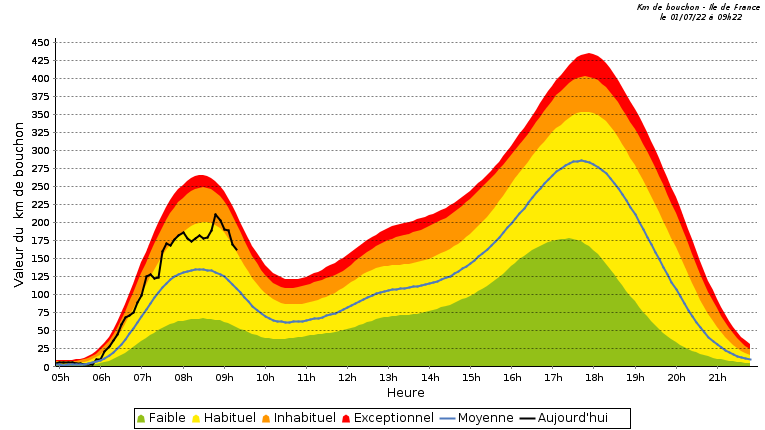

In [28]:
import requests
import bs4
from IPython import display

raw_html = requests.get("http://www.sytadin.fr/sys/barometre_courbe_cumul.jsp.html")
soup = bs4.BeautifulSoup(raw_html.text, features="html.parser")

elem = soup.find(name="img", attrs={"alt":"Courbe du cumul de bouchon"})
img_path = elem.get("src")
img_data = requests.get(f"http://www.sytadin.fr{img_path}").content

display.display(display.Image(img_data))

En utilisant les données du trafic parisien, nous avons pu **modéliser le graphe** de variation théorique de densité du trafic et donc d’embouteillage en fonction du temps.  
Nous avons modélisé notre courbe **avec un échantillon de données**. Nous obtenons donc la courbe ci-après.

![EtudeAlgoPV](../Stat-Image/Modelisation%20du%20trafic.png)

Nous remarquons que, par rapport à l’alignement des points, la fonction **$a*X^2 + c$** avec $a, c ∈\mathbb{R}^+$ est la plus adéquate pour **répondre à nos exigences**.  
Cela nous amène donc à une modélisation plus propre de notre courbe que l’on retrouve ci-après.  
Cette courbe est défini sur l’intervalle $[0 ; 2{\frac{\sqrt{c}}{\sqrt{a}}}]$.

En supposant que **1 distance unitaire représente un temps de 1 énergie**, nous ajoutons à cette fonction le calcul de la distance entre les sommets de notre graphe.

La formule est donc :
**$F(t) = -a*(t - {\frac{\sqrt{c}}{\sqrt{a}}})^2 + c + d$**  
avec $a,c,d∈\mathbb{R}^+$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$d$ la distance entre deux sommets

![EtudeAlgoPV](../Stat-Image/Trafic.png)

L’axe des ordonnée (F) représente **l’amplitude de la fonction**. 

Par étude de la courbe, nous pouvons observer que **la fonction admet un point critique** (optimum maximal) représentant le plus mauvais cas.  
Ce dernier est équivalent à **notre amplitude maximum du coût d'un trajet**. 

Nous pouvons donc conclure sur le fait que la modélisation du trafic est variable et que nous pouvons influer sur cette modélisation au travers de nos variables a et c.  
Similairement, **notre calcul du poids semble réaliste**.

#### 2.3.2 Modélisation des données

Au cours de notre modélisation formelle, nous avons défini certaines données :
* la distance d'un sommet à un autre ;
* l'appartenance d'un sommet à une catégorie ($V$ et $L$ ou $D$) ;
* le coût variable du déplacement d'un sommet à un autre.

Soit **$n$ la taille de l'instance de notre problème** correspondant au nombre de sommets $V$.

Nous avons donc choisi de représenter nos données dans le format suivant :
* $Point$ **une matrice de taille $n$, $3$** dans laquelle chaque sommet se verra attribuée deux coordonnées qui nous permettront de calculer la distance les séparant et un numéro correspondant au type de sommet : 0 pour un sommet ne devant pas être visité ; 1 pour une sommet qui doit être visité ; 2 pour le sommet de départ/arrivé ;
* $Graphe$ **une matrice de taille $n$, $n$, $3$** dans laquel se trouvera les 3 paramètres de calcul du poids (a, c et d) d'un arc.

Un exemple de représentation de ces matrices pour une instance $n=3$ serait :

Matrice $Point$ :  
[[1, 1, 0],  
&nbsp;[2, 2, 1],  
&nbsp;[3, 3, 2]]

Matrice $Graphe$ :  
[[[0, 0, 0], [1, 1, 8], [0, 1, 2]],  
&nbsp;[[5, 8, 1], [0, 0, 0], [4, 0, 9]],  
&nbsp;[[4, 3, 5], [0, 0, 7], [0, 0, 0]]]  

## 3. Implémentation

Ainsi, nous avons déterminé qu'une solution pouvait être trouvée par un algorithme non-déterministe et nous avons validé une représentation des données.

Nous nous sommes alors intéressés à l'implémentation d'algorithmes dans l'objectif de trouver une solution intéressante.

### 3.1 Bibliothèques

Tout d'abord, nous avons sélectionné des **bibliothèques python** afin de permettre de **réaliser les différentes opérations** dont nous aurons besoin.

Ainsi, nous retrouvons :
* **numpy** nous permet de **construire facilement des matrices**.  
Il s'agit de la bibliothèque python la plus utilisée pour ce choix car elle est performante et facile à utiliser. C'est pour cette raison que nous l'avons choisi.
* **matplotlib.pyplot** nous permet de **réaliser des représentations** de nos instances et des graphiques de nos courbes.  
A nouveau, il s'agit de la bibliothèque python la plus utilisée pour ce choix car elle est performante, facile à utiliser et particulièrement complète. C'est pour cette raison que nous l'avons choisi.
* **random**nous permet de **générer des nombres aléatoires**.  
A l'inverse de numpy qui couvre également en parti cette fonctionnalité, notre attention s'est portée sur cette dernière car elle est plus performante et plus complète.
* **math** nous permet d'élargir les **outils mathématiques** que couvre Python.  
Il s'agit de la bibliothèque python la plus utilisée pour ce choix car elle est performante, complète et facile à utiliser. C'est pour cette raison que nous l'avons choisi.
* **time** nous permet de **mesurer le temps** nécessaire au calcul de chaque algorithme.  
Il s'agit de la bibliothèque python la plus utilisée pour ce choix car elle est performante, complète et facile à utiliser. C'est pour cette raison que nous l'avons choisi.

Grâce à ces bibliothèques, nous pouvons donc réaliser l'ensemble des opérations que nos algorithmes auront besoin pour fonctionner.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *
import time

### 3.2 Générateur

Avant de pouvoir proposer des solutions algorithmiques à notre problème, nous avons implémenté un générateur afin de générer des instances aléatoires réalistes pour le problème que nous avons modélisé précédemment.

Il se compose donc de 3 fonctions :
* GeneratorCity permet de générer des couples de coordonnées distincts de $nb\_city$ dans une map de taille $size\_map$ ;  
* DefinitionCity permet de définir si une ville doit être livrée ou s'il s'agit du dépôt ;
* GeneratorGraph permet de générer une matrice de taille $nb\_city$ qui reflète le poids de chaque arrête avec ses paramètres de fluctuation aléatoires.



In [16]:
def GeneratorCity(nb_city: int = 10, size_map: tuple = (100, 100)) -> list:
    """
    Return a list of cities with random coordinates and their utility

    Arguments:
        nb_city: Number of cities
        size_map: Area of the map in this format : (max_abscissa, max_ordinate)
        display: Draw a diagram of the situation

    Return:
        An array of cities with the abscissa, ordinate and the use of each cities ;
        0 means "This city is not important" ;
        1 means "This city must be delivered" ;
        2 means "This city is the depository" ;
    """

    # Randomization of points
    abscissa = random.sample(range(0, size_map[0]), nb_city)
    ordinate = random.sample(range(0, size_map[1]), nb_city)

    # Return the list of coordinate
    return [[abscissa[i],ordinate[i]] for i in range(nb_city)]


def DefinitionCity(cities: list, only_delivered: bool = False) -> list:
    """
    Defines the type of cities

    Arguments:
        cities: The cities
        only_delivered: Removal of undelivered cities

    Return:
        The list of cities
    """

    # Define the kind of city
    if only_delivered:
        delivered = [1] * len(cities)
    else:
        delivered = random.choices(population=[0, 1], k=len(cities))

    # Define a repository
    delivered[random.randint(1, len(cities)) - 1] = 2

    # Return the list of city
    return [[cities[i][0],cities[i][1],delivered[i]] for i in range(len(cities))]


def GeneratorGraph(cities: list, fluctuation: int = 10, fluctuation_weight: int = 10):
    """
    Return the graph of the instance

    Arguments:
        cities: The coordinate from the city in this format : [max_abscissa, max_ordinate]
        fluctuation: The rate of fluctuation of the cost of the arcs
        fluctuation_weight: The fluctuation amplitude of the cost of the arcs

    Return:
        A matrix of size [nb_city, nb_city, 3]
    """

    # Initialization of the graph matrix
    generator = np.array([[(0, 0, 0)] * len(cities)] * len(cities))

    # For each element of the graph
    for i in range(len(cities)):
        for j in range(len(cities)):
            if i != j:
                # Traffic randomization
                if fluctuation == 0:
                    arc_fluctuation = 0
                else:
                    arc_fluctuation = random.randint(0, fluctuation)
                # Calculation of the distance between two points
                arc_min_cost = sqrt(pow(cities[i][0] - cities[j][0], 2) + pow(cities[i][1] - cities[j][1], 2))
                # Randomization of the traffic amplitude
                if fluctuation_weight == 0:
                    arc_fluctuation_weight = 0
                else:
                    arc_fluctuation_weight = random.randint(0, fluctuation_weight) * arc_min_cost
                
                # Completion of the matrix
                generator[i][j] = (arc_fluctuation, arc_fluctuation_weight, arc_min_cost)

    # Return the matrix
    return generator

Ainsi, nous pouvons générer une instance grâce au code ci-dessous.

*Remarque :*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Nous garderons cette instance tout au long de notre démonstration.

In [17]:
# Seed of generation
random.seed(a=5)

# Generator settings
nbPoints = 200
Size_Map = (1000, 1000)
Fluctuation = 1
Fluctuation_Weight = 1

# Generation of cities
points = DefinitionCity(GeneratorCity(nbPoints, Size_Map))

print(points)

# Generation of the graph
graph = GeneratorGraph(points, Fluctuation, Fluctuation_Weight)

print(graph)

[[637, 645, 0], [261, 918, 0], [759, 806, 0], [367, 423, 0], [814, 109, 1], [707, 172, 1], [965, 444, 0], [861, 381, 0], [757, 152, 0], [667, 60, 0], [944, 865, 0], [542, 430, 0], [29, 301, 0], [860, 144, 1], [476, 464, 1], [794, 944, 0], [993, 635, 0], [255, 872, 1], [664, 173, 1], [53, 534, 0], [922, 985, 1], [160, 499, 1], [115, 705, 0], [380, 747, 1], [480, 325, 0], [889, 490, 0], [252, 280, 1], [389, 298, 0], [556, 481, 1], [104, 413, 0], [587, 923, 1], [982, 150, 1], [13, 115, 0], [748, 386, 0], [221, 841, 0], [417, 544, 1], [286, 183, 0], [186, 642, 1], [938, 959, 0], [888, 511, 0], [784, 888, 1], [398, 346, 1], [163, 184, 0], [780, 91, 0], [816, 503, 0], [73, 278, 0], [142, 527, 0], [632, 800, 1], [952, 561, 0], [455, 961, 0], [129, 514, 0], [135, 369, 0], [1, 64, 1], [892, 804, 1], [5, 814, 0], [214, 793, 0], [792, 364, 1], [220, 711, 1], [169, 601, 1], [893, 679, 1], [170, 35, 1], [296, 777, 0], [321, 313, 0], [203, 372, 0], [552, 572, 1], [897, 721, 1], [694, 684, 1], [640, 

### 3.3 Affichage des résultats

Afin d'obtenir des résultats qui peuvent être facilement compris, nous avons également défini des fonctions d'affichage.  

Nous avons réalisé 3 fonctions dans ce but :
* DisplayGeneratorGraph permet de générer une vue représentative de notre graphe contenant les paramètres pour le calcul des coût des arcs ;
* DisplayFigure permet d'afficher les villes en fonction de leur définition dans un repère orthonomé ;
* DisplayCycle permet d'afficher le circuit dans un repère orthonomé.

In [18]:
def DisplayGeneratorGraph(graph: np.array([[()]])):
    """
    Print the graph

    Arguments:
        graph: The graph
    """
    
    # For each line
    for i in range(np.shape(graph)[0]):
        # Begin with the check mark character
        print("[", end="")

        # For each column
        for j in range(np.shape(graph)[1]- 1):
            # Print the value and add a comma
            print(graph[i][j], end=", ")

        # Print the last value of the line and close it
        print(str(graph[i][j+1]) + "],")


def DisplayFigure(ax, cities: list, annotate: bool = True, red: bool = True):
    """
    Display a figure with the cities

    Arguements:
        cities: The cities
    """
    
    # Get each cities and display them
    for i in range(len(cities)):
        # Display each points
        if red or cities[i][2] != 0:
            ax.scatter(cities[i][0], cities[i][1], c= "red" if cities[i][2] == 0 else "blue" if cities[i][2] == 1 else "green")

    # Set the name of each points
    if(annotate):
        for i in range(len(cities)):
            ax.annotate(str(i+1), (cities[i][0], cities[i][1]))


def DisplayCircuit(ax, cities: list, path: list, annotate: bool = True, red: bool =True):
    """
    Display a figure with the path

    Arguments:
        cities: The cities
        path: The path
    """

    # Display the cities
    DisplayFigure(ax, cities, annotate, red)
    
    # Get each arc of the path
    for i in range(len(path) - 1):
        # Trace the arrow
        ax.arrow(
            x = cities[path[i] - 1][0], 
            y = cities[path[i] - 1][1], 
            dx = cities[path[i+1] - 1][0] - cities[path[i] - 1][0], 
            dy = cities[path[i+1] - 1][1] - cities[path[i] - 1][1],
            head_width = 1, 
            length_includes_head=True)

En utilisant les fonctions, nous obtenons donc :

[[0 0 0], [  0   0 464], [  0 202 202], [  0   0 349], [  0   0 564], [  0   0 478], [  0   0 384], [  1 346 346], [  1   0 507], [  1 585 585], [  1 377 377], [  1 235 235], [  1   0 698], [  0   0 548], [  0   0 242], [  1 337 337], [  1   0 356], [  1   0 444], [  1   0 472], [  1   0 594], [  0 443 443], [  0 498 498], [  1 525 525], [  0   0 276], [  1 356 356], [  0   0 295], [  1 530 530], [  1   0 426], [  0   0 182], [  0   0 581], [  0   0 282], [  1 603 603], [  1   0 818], [  1 281 281], [  1   0 459], [  1   0 242], [  0   0 580], [  0   0 451], [  1 434 434], [  0 284 284], [  0 284 284], [  1   0 382], [  0   0 661], [  1   0 572], [  0   0 228], [  1   0 672], [  1   0 508], [  0   0 155], [  1 326 326], [  0   0 364], [  1 524 524], [  1 572 572], [  0   0 861], [  0   0 300], [  1   0 654], [  0   0 448], [  1   0 320], [  0   0 422], [  0   0 470], [  0 258 258], [  1 768 768], [  1 365 365], [  0   0 458], [  1 512 512], [  0   0 112], [  0 270 270], [ 1  0 69], [  

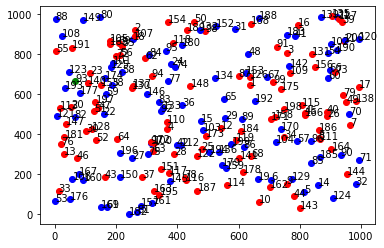

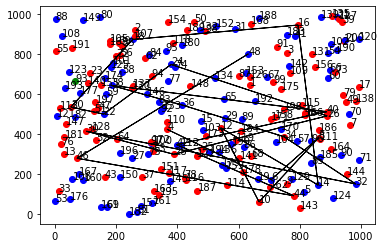

In [19]:
DisplayGeneratorGraph(graph)

# Initiate the first figure
fig1, ax1 = plt.subplots()
DisplayFigure(ax1, points)

# Initiate the second figure
RandomPath = range(4,50,2)
fig2, ax2 = plt.subplots()
DisplayCircuit(ax2, points, RandomPath)

### 3.4 Calcul des coûts d'un chemin

Afin de calculer le coup d'un chemin (y compris d'un arc) à tout moment t, nous avons également créé des fonctions.

Pour cela, nous avons créé 2 fonctions :
* CalculArc permet de calculer le coût d'un arc allant d'un sommet x à un sommet y à un instant $time$ ;
* EnergieSum permet de calculer le coût d'un chemin total ;

In [20]:
def CalculArc(graph: np.array([[()]]), time: float, arc: tuple) -> float:
    """
    Calculates the time needed to use an arc at a given time

    Arguments:
        graph: The graph
        time: The moment the arc is use
        arc: A tuple with (start node, end node)
    
    Return:
        The time used
    """

    # Recovering data from the arc
    a = graph[arc[0]-1][arc[1]-1][0]
    c = graph[arc[0]-1][arc[1]-1][1]
    d = graph[arc[0]-1][arc[1]-1][2]

    # Only if a fluctuation is present
    if a != 0 and c != 0:
        # Calculation of the interval of the function
        intervalle = 2*sqrt(c)/sqrt(a)
        # Time transposition on the function
        time = time % intervalle
        # Calculation of the cost of the arc
        return -1 * a * pow(time - sqrt(c)/sqrt(a), 2) + c + d
    
    else:
        # Return the minimum cost
        return d


def EnergieSum(graph: np.array([[()]]), cycle: tuple) -> float:
    """
    Calculation of the energies of the graph

    Arguments:
        graph: The graph

    Return:
        The energie of the graph
    
    """
    # Energy initialization
    energie = 0

    # For each point of the graph
    for i in range(len(cycle) - 1):
        # Add the energy of the path
        energie += CalculArc(graph, energie, (cycle[i], cycle[i+1]))
    
    return energie

En utilisant nos fonctions, nous obtenons :

In [21]:
print("Le coût de l'arc (24, 72) vaut %s à l'instant t=50" % CalculArc(graph, 30, (25,72)))

RandomPath = range(4,50,2) # Pour rappeler
print("Le coût du chemin RandomPath vaut %s" % EnergieSum(graph, RandomPath))

Le coût de l'arc (24, 72) vaut 540 à l'instant t=50
Le coût du chemin RandomPath vaut 12810.137657070038


## 3.5 Implémentation des algorithmes

En ayant défini l'ensemble des fonctions de génération, d'affichage et de coût, nous avons pu réfléchir à l'implémentation de nos algorithmes.

### 3.5.1 Justification de l'utilisation des algorithmes

Le problème que l'on nous demande de traiter dans ce projet repose sur un problème plus largement étudier qui est celui du **voyageur de commerce** (TSP). Ce problème est un sujet bien connu en algorithmique du fait de sa complexité initial et du nombre de sous problèmes qu'il soulève. Pour le résoudre, nous avons choisi de **suivre les études faites sur le sujet**.

Nous avons donc **selectionné 3 algorithmes** pour nous aider à résoudre notre problématique générale. Chacun d’eux a **ses avantages et ses inconvénients**.  
Il faudra donc retenir que nous n'obtiendrons pas forcément la même solution dans la mesure où nous privilégeons le temps de calcul, la qualité de la solution, ou encore le choix des solutions.

* Nous pouvons commencer par citer le **premier algorithme** que nous avons utilisé qui fait partie de la **famille des algorithmes gloutons**.   
Il s'agit d'une famille d'algorithme qui font le choix de sélectionner l'optimum local pour chaque étape d'un problème. Celui que nous avons retenu est l’**algorithme du plus proche voisin** (Nearest Neightbors Algorithm).  
Il nous permettra de **récupérer une solution valide très rapidement, mais rarement optimale**.  
&nbsp;  
L'algorithme du plus proche voisin se base, comme son nom l'indique, sur **la sélection du sommet le plus proche du sommet actuel**. Le principe est que le sommet sélectionné possède **le poids de l'arrête le plus petit possible** parmi les sommets qui n'ont pas encore été visité. L'opération sera répétée jusqu'à avoir **visité tous les sommets** et **être revenu au sommet de départ du circuit**.  
&nbsp;  
Cette solution devrait donc proposée **une solution très rapide à calculer** bien qu'elle **ne garantisse pas de proposer une solution performante**.

&nbsp;  

* Pendant nos recherches sur le sujet, nous sommes tombés sur une thèse qui introduit differents algorithmes permettant la résolution du voyageur de commerce.  
On y retrouve l'algorithme fourmis, l'algorithme génétique et l'algorithme du recuit simulé qui sont des **algorithmes méta-heuristiques** qui sont des algorithmes pouvant **utiliser des solutions précédemment trouvées afin d'essayer de les améliorer**.  
Bien que les deux premiers soient intéréssant sur le principe, **leurs paramétrages sont particulièrement complexe** à mettre en place.  
Nous nous sommes donc concentrés sur **l'algorithme du recuit simulé** (simulated annealing).  
&nbsp;  
Nous avons donc approfondi nos recherches sur l'algorithme du recuit simulé d'après la thèse en annexe et ce que nous avons vu durant nos prosits. L'algorithme du recuit simulé nous a semblé facile à implémenter dans un premier temps mais nous avons vite remarqué que sa configuration serait plus fastidieuse que prévu du fait de ses **nombreux paramètres**.  
Des études théoriques du recuit simulé ont pu montrer qu'en utilisant certains paramètres, l'algorithme du recuit simulé **converge vers un optimum global**. Cela veut donc dire que, contrairement à d'autres algorithmes métaheuristiques, **le recuit simulé peut déterminer une solution correspondant à la meilleure solution, s'il peut chercher indéfiniment**.  
&nbsp;  
Ainsi, nous avons pu comprendre que l'implémentation d'un tel algorithme peut se réaliser en **2 étapes** :
   * La première étape consiste à **implémenter les règles d'optimisation** de la solution en définissant les relations des paramètres ;
   * La deuxième étape consiste à **déterminer les paramètres**. Dans notre étude, nous utiliserons une **approche empirique**.  
&nbsp;  
Cette solution devrait donc proposée **une solution intéressante** tout en étant d'une **rapidité modérée à calculer**.

&nbsp;  

* Enfin, nous avons porté notre choix sur la mise en place d'une **combinaison d'algorithmes** pour résoudre notre problème.  
Cet algorithme sera donc la **combinaison des deux algorithmes précédents**.  
Cela est réalisable car l'algorithme du plus proche voisin converge vers un optimum local qui peut être repris par l'algorithme du recuit simulé dans le but de trouver une **solution optimisée**.  
&nbsp;  
Cette solution devrait donc proposée **la solution la plus intéressante** bien qu'elle sera **la plus longue à calculer**.

### 3.5.2 Algorithme du plus proche voisin

L'**algorithme naïf du plus proche voisin** consiste à passer sur l'ensemble des $n$ sommets de $L$ et à **choisir le sommet le plus proche** de notre sommet courrant puis à répéter cette opération jusqu'à avoir visité chaque sommet. On obtient alors une **complexité temporelle linéaire** en la taille de $L$. Cette méthode est appelée la **recherche séquentielle ou recherche linéaire**.

La recherche linéaire souffre d'un problème de lenteur. Si l'ensemble A est grand, il est alors **extrêmement coûteux de tester les $n$ sommets** de l'espace à chaque itération.

Voici donc notre implémentation de l'algorithme du plus proche voisin :

In [22]:
def NearestNeightbor(graph: np.array([[()]]), time: float, start_city: int, cities_available: list):
    """
    Get the nearest neightbor city which isn't use

    Arguments:
        graph: The graph
        time: The start time
        start_city: The start city
        cities_available: The list of cities which are available

    Return:
        The nearest neightbor city and the add time needed
    """

    nearest_neightbor = cities_available[0]
    lowest_time = CalculArc(graph, time, (start_city, cities_available[0]))

    for cities in cities_available[1:]:
        current_time = CalculArc(graph, time, (start_city, cities))
        if current_time < lowest_time:
            lowest_time = current_time
            nearest_neightbor = cities

    if len(cities_available) > 1:
        return [nearest_neightbor] + NearestNeightbor(graph, time + lowest_time, nearest_neightbor, [city for city in cities_available if city != nearest_neightbor])
    else:
        return [nearest_neightbor]


En exécutant l'algorithme du plus proche voisin sur notre instance, nous obtenons donc :

--- 0.04571413993835449 seconds ---
Coût du circuit : 9355.3869989072.
Circuit : [93, 193, 177, 59, 38, 174, 125, 101, 58, 84, 95, 180, 24, 74, 77, 146, 83, 133, 92, 36, 65, 29, 15, 103, 42, 112, 194, 136, 199, 86, 104, 170, 57, 96, 185, 85, 90, 71, 32, 124, 14, 5, 129, 6, 19, 179, 159, 145, 161, 157, 81, 182, 61, 169, 176, 53, 106, 167, 160, 150, 196, 27, 75, 97, 22, 121, 82, 123, 108, 88, 149, 80, 18, 132, 152, 31, 188, 183, 41, 102, 54, 190, 200, 120, 21, 139, 66, 60, 142, 67, 153, 48, 134, 192, 89, 70, 93].


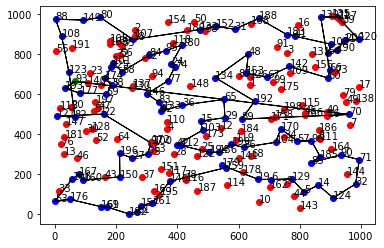

In [23]:
# Get the start time
start_time = time.time()

# Get the point of repository
i = 0
while points[i][2] != 2:
    i += 1
repository = i + 1

# Get the circuit of the graph
NearestNeightborCircuit = [repository] + NearestNeightbor(graph, 0, repository, [x+1 for x, y in enumerate(points) if y[2] == 1]) + [repository]

print("--- %s seconds ---" % (time.time() - start_time))

print("Coût du circuit : %s." % EnergieSum(graph, NearestNeightborCircuit))
print("Circuit : " + str(NearestNeightborCircuit) + ".")
# Initiate the figure
figNearestNeightbor, axNearestNeightbor = plt.subplots()
DisplayCircuit(axNearestNeightbor, points, NearestNeightborCircuit)

### 3.5.3 Recuit simulé

Le **recuit simulé** est une technique probabiliste permettant d’**approcher l’optimum global** d’une fonction donnée.

Spécifiquement, il est métaheuristique d'**approcher l'optimisation globale dans un grand espace** de recherche pour un problème d'optimisation. Il est souvent utilisé lorsque l'**espace de recherche est discret** (par exemple, le problème du vendeur voyageur). Pour les problèmes dans lesquels la recherche d'un optimum global approximatif est plus importante que la recherche d'un optimum local précis dans un laps de temps déterminé, un recuit simulé peut être préférable à des alternatives telles que la descente de gradient.

Voici donc notre implémentation du recuit simulé :

In [24]:
def BasicChange(cycle: tuple, nbPoints):
    """
    Select a segment of the cycle and either reverse it or splice it elsewhere all at random

    Arguments:
        cycle: The cycle

    Return:
        The new cycle
    """

    # Index of the first element
    rand1 = random.randint(1, nbPoints)

    # Loop to avoid rand1 == rand2
    cond = True
    while(cond):
        # Select the second element
        rand2 = random.randint(1, nbPoints)
        cond = rand1 == rand2

    # Format the random numbers so that rand1 is less than rand2
    if rand1>rand2 :
        rand1, rand2 = rand2, rand1

    # Selected segment
    segment = cycle[rand1:rand2]

    # Choose at random which change will be made
    if(random.randint(0,1)):
        # Reverse the segment
        segment.reverse()
        return cycle[:rand1]+segment+cycle[rand2:]

    else:
        # Move the segment
        reste = cycle[:rand1]+cycle[rand2:]
        # Loop to avoid rand1 == rand2
        cond = True
        while(cond):
        # Select the second element
            rand3 = random.randint(1, len(reste) - 1)
            cond = rand1 == rand3
        
        return reste[:rand3]+segment+reste[rand3:]


def Recuit(graph: np.array([[()]]), cycle: list, energie: float):
    """
    Find the shortest cycle using the simulated annealing algorithm

    Arguments:
        graph: The graph with the weight
        cycle: A valid path
        energie: The cost of the cycle
        temperature: The coefficient of research
        tempmin: The limit of temperature
        multipli: The modification coefficient

    Return:
        A cycle and the energie associated
    """
    nbPoints = cycle.__len__()-2
    temperature = 20.0
    condition = True
    while(condition):
        nbChanges = 0
        for _ in range(nbPoints*100):
            # Create a new path
            newP = BasicChange(cycle, nbPoints)

            # Calculate the cost of the new path
            newE = EnergieSum(graph, newP)

            # If the new path is bether
            if newE<energie :
                # Change the best record
                energie = newE
                cycle = newP
                nbChanges += 1
                if(nbChanges == 10*nbPoints):
                    break

            elif newE != energie and random.random() < exp(-(newE-energie)/temperature):
                energie = newE
                cycle = newP
        temperature *= 0.9
        condition = nbChanges != 0

    return cycle, energie

Dans le but de trouver une solution satisfaisante dans un temps polynomial, nous avons déterminé de manière empirique les paramètres de température et de décroissance.

Pour ce faire, nous avons exécuté notre algorithme du recuit simulé avec des paramètres aléatoires et avons regardé la forme de la courbe qui était formé après chaque modification du chemin.

Avec les valeurs 20 pour la température et 0.9 pour la décroissance, nous avons observé que l'algorithme trouvait une solution performante dans un temps assez court. C'est donc celle-ci que nous avons choisi.

Text(0.5, 1.0, "Coût du circuit en fonction de l'iteration du recuit simulé")

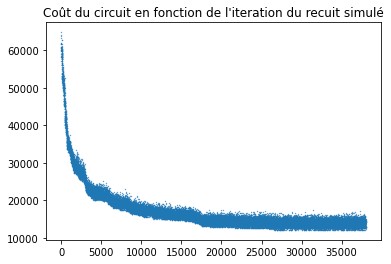

In [25]:
def RecuitMesured(graph: np.array([[()]]), cycle: list, energie: float):
    """
    Find the shortest cycle using the simulated annealing algorithm

    Arguments:
        graph: The graph with the weight
        cycle: A valid path
        energie: The cost of the cycle
        temperature: The coefficient of research
        tempmin: The limit of temperature
        multipli: The modification coefficient

    Return:
        A cycle and the energie associated
    """
    nbPoints = cycle.__len__()-2
    temperature = 0.5
    condition = True
    listEnergie = [EnergieSum(graph, cycle)]
    while(condition):
        nbChanges = 0
        for _ in range(nbPoints*100):
            # Create a new path
            newP = BasicChange(cycle, nbPoints)

            # Calculate the cost of the new path
            newE = EnergieSum(graph, newP)

            # If the new path is bether
            if newE<energie :
                # Change the best record
                energie = newE
                cycle = newP
                nbChanges += 1
                if(nbChanges == 10*nbPoints):
                    break

            elif newE != energie and random.random() < exp(-(newE-energie)/temperature):
                energie = newE
                cycle = newP
            listEnergie.append(newE)
        temperature *= 0.9
        condition = nbChanges != 0

    return listEnergie

# Create a path with every cities which need to be delivered
RecuitMesuredCircuit = []
for i in range(len(points)):
    if points[i][2] == 1:
        RecuitMesuredCircuit += [i+1]
# Get the repository point
repository = [x+1 for x, y in enumerate(points) if y[2] == 2]
# Add the depository on the path
RecuitMesuredCircuit = repository + RecuitMesuredCircuit + repository

RecuitMesuredEnergie = EnergieSum(graph, RecuitMesuredCircuit)

listEnergieMesured = RecuitMesured(graph, RecuitMesuredCircuit, RecuitMesuredEnergie)

figRecuitMesured, axRecuitMesured = plt.subplots()
axRecuitMesured.scatter(range(1, len(listEnergieMesured) + 1), listEnergieMesured, s=0.1)
axRecuitMesured.set_title("Coût du circuit en fonction de l'iteration du recuit simulé")


En exécutant l'algorithme du recuit simulé et en lui fournissant un circuit aléatoire, nous obtenons le résultat ci-dessous :

Random circuit :
Time cost : 63900.47086391551.
Circuit use : [93, 5, 6, 14, 15, 18, 19, 21, 22, 24, 27, 29, 31, 32, 36, 38, 41, 42, 48, 53, 54, 57, 58, 59, 60, 61, 65, 66, 67, 70, 71, 74, 75, 77, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92, 95, 96, 97, 101, 102, 103, 104, 106, 108, 112, 120, 121, 123, 124, 125, 129, 132, 133, 134, 136, 139, 142, 145, 146, 149, 150, 152, 153, 157, 159, 160, 161, 167, 169, 170, 174, 176, 177, 179, 180, 182, 183, 185, 188, 190, 192, 193, 194, 196, 199, 200, 93]


--- 43.9184844493866 seconds ---
Optimized circuit :
Time cost : 10414.699005806935.
Circuit use : [93, 123, 108, 88, 149, 80, 18, 101, 174, 59, 38, 177, 193, 121, 82, 22, 196, 27, 42, 136, 199, 194, 92, 133, 146, 83, 77, 24, 74, 84, 95, 180, 132, 152, 31, 188, 67, 48, 134, 192, 153, 142, 183, 41, 139, 21, 120, 200, 102, 54, 190, 60, 66, 70, 96, 104, 170, 57, 90, 71, 32, 124, 185, 85, 14, 5, 129, 6, 19, 179, 159, 86, 161, 157, 182, 81, 61, 169, 53, 176, 160, 106, 167, 150, 145, 112, 75, 97, 36, 1

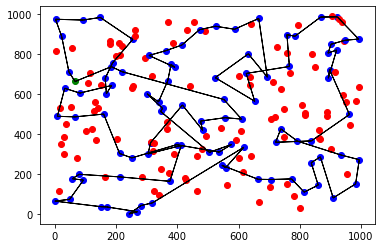

In [26]:
# Create a path with every cities which need to be delivered
RecuitCircuit = []
for i in range(len(points)):
    if points[i][2] == 1:
        RecuitCircuit += [i+1]
# Get the repository point
repository = [x+1 for x, y in enumerate(points) if y[2] == 2]
# Add the depository on the path
RecuitCircuit = repository + RecuitCircuit + repository

RecuitEnergie = EnergieSum(graph, RecuitCircuit)
print("Random circuit :")
print("Time cost : %s." % RecuitEnergie)
print("Circuit use : " + str(RecuitCircuit) + "\n\n")

## Improvement of the solution
start_time = time.time()
RecuitCircuit, RecuitEnergie = Recuit(graph, RecuitCircuit, RecuitEnergie)

print("--- %s seconds ---" % (time.time() - start_time))
print("Optimized circuit :")
print("Time cost : %s." % RecuitEnergie)
print("Circuit use : " + str(RecuitCircuit))
# Initiate the figure
figRecuit, axRecuit = plt.subplots()
DisplayCircuit(axRecuit, points, RecuitCircuit, nbPoints<100, nbPoints<1000)

### 3.5.4 Algorithme combinatoire

L'algorithmie combinatoire est une technique consistant à **combiner les solutions d'optimisation** de plusieurs algorithmes proposant des solutions convergeant vers un optimum local.  

Nous souhaitons ici, injecter le résultat trouvé par l'algorithme du plus proche voisin dans l'algorithme du recuit simulé afin de **trouver une solution la plus performante** possible.

En utilisant les deux algorithmes précédents, nous trouvons donc :

Nearest Neightbors circuit :
--- 0.11475396156311035 seconds ---
Time cost : 9355.3869989072.
Circuit use : [93, 193, 177, 59, 38, 174, 125, 101, 58, 84, 95, 180, 24, 74, 77, 146, 83, 133, 92, 36, 65, 29, 15, 103, 42, 112, 194, 136, 199, 86, 104, 170, 57, 96, 185, 85, 90, 71, 32, 124, 14, 5, 129, 6, 19, 179, 159, 145, 161, 157, 81, 182, 61, 169, 176, 53, 106, 167, 160, 150, 196, 27, 75, 97, 22, 121, 82, 123, 108, 88, 149, 80, 18, 132, 152, 31, 188, 183, 41, 102, 54, 190, 200, 120, 21, 139, 66, 60, 142, 67, 153, 48, 134, 192, 89, 70, 93]


Optimized circuit :
--- 36.85114336013794 seconds ---
Time cost : 8779.052214816269.
Circuit use : [93, 123, 193, 177, 38, 59, 174, 125, 101, 58, 146, 92, 133, 83, 36, 77, 74, 24, 180, 95, 84, 108, 88, 149, 80, 18, 132, 152, 31, 188, 183, 41, 139, 21, 120, 200, 102, 54, 190, 66, 60, 142, 67, 153, 48, 134, 192, 89, 65, 29, 199, 86, 104, 70, 170, 57, 96, 185, 85, 90, 71, 32, 124, 14, 5, 129, 6, 19, 159, 179, 136, 194, 103, 15, 112, 42, 145, 161, 157, 81

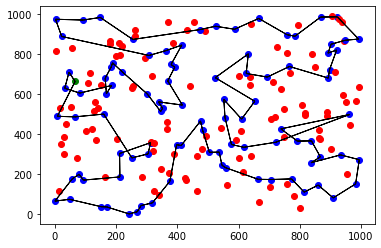

In [29]:
# Get the start time
start_time = time.time()

# Get the point of repository
i = 0
while points[i][2] != 2:
    i += 1
repository = i + 1

# Get the circuit of the graph
CombinatedCircuit = [repository] + NearestNeightbor(graph, 0, repository, [x+1 for x, y in enumerate(points) if y[2] == 1]) + [repository]

CombinatedEnergie = EnergieSum(graph, CombinatedCircuit)
print("Nearest Neightbors circuit :")
print("--- %s seconds ---" % (time.time() - start_time))
print("Time cost : %s." % CombinatedEnergie)
print("Circuit use : " + str(CombinatedCircuit) + "\n\n")

## Improvement of the solution
CombinatedCircuit, CombinatedEnergie = Recuit(graph, CombinatedCircuit, CombinatedEnergie)

print("Optimized circuit :")
print("--- %s seconds ---" % (time.time() - start_time))
print("Time cost : %s." % CombinatedEnergie)
print("Circuit use : " + str(CombinatedCircuit))
# Initiate the figure
figCombinated, axCombinated = plt.subplots()
DisplayCircuit(axCombinated, points, CombinatedCircuit, nbPoints<100, nbPoints<1000)

## 4. Exploitation

Afin de bien **connaître l'efficacité de nos différents algorithmes**, nous avons réalisé **une étude statistique**.

Cette étude nous a servi à démontrer que **la relation entre la performance d'une solution, le temps nécessaire pour la trouver et la taille de l'instance**.

### 4.1 Etude de l'algorithme des plus proches voisins

En traçant les courbes (temps <span style="color:red">maximum</span>, <span style="color:blue">moyen</span> et <span style="color:green">minimum</span> par rapport à la taille de l'instance) de l'algorithme du plus proche voisin, nous pouvons observer le résultat ci-dessous.

![EtudeAlgoPV](../Stat-Image/Nearest%20Neightbors%20Algorithm%20-%20Time%20taken%20by%20number%20of%20points.png)


Nous pouvons constater que le temps nécessaire au traitement d'une instance de taille $n$ pour les 3 courbes est négligeable pour $n<100$ (0,02 secondes au pire et 0,006 secondes en moyenne).$

Nous en concluons que **l'algorithme des plus proches voisins propose bien une réponse dans un temps polynomial**.

### 4.2 Etude de l'algorithme du recuit simulé

En traçant les courbes (temps <span style="color:red">maximum</span>, <span style="color:blue">moyen</span> et <span style="color:green">minimum</span> par rapport à la taille de l'instance) de l'algorithme du recuit simulé, nous pouvons observer le résultat ci-dessous.

![EtudeAlgoPV](../Stat-Image/Simulated%20Annealing%20-%20Time%20taken%20by%20number%20of%20points.png)

Nous pouvons constater que le temps nécessaire au traitement d'une instance de taille $n$ pour les 3 courbes est négligeable pour $n<100$ bien qu'il soit plus important que pour l'algorithme des plus proches voisins (17,5 secondes au pire et 12 secondes en moyenne).  
Nous pouvons également remarquer que, bien que l'ordre des temps ne soit pas similaire, les courbes du recuit simulé sont bien plus confondues que celles de l'algorithme des plus proches voisins.

Nous en concluons que **l'algorithme du recuit cumulé propose bien une réponse dans un temps polynomial**.

### 4.3 Etude de l'algorithme combinatoire

En traçant les courbes (temps <span style="color:red">maximum</span>, <span style="color:blue">moyen</span> et <span style="color:green">minimum</span> par rapport à la taille de l'instance) de l'algorithme combinatoire, nous pouvons observer le résultat ci-dessous.

![EtudeAlgoPV](../Stat-Image/Combinated%20Algorithm%20-%20Time%20taken%20by%20number%20of%20points.png)

Nous pouvons constater que le temps nécessaire au traitement d'une instance de taille $n$ pour les 3 courbes est négligeable pour $n<100$ bien qu'il soit **plus important que pour l'algorithme des plus proches voisins** mais **plus court que celui du recuit simulé** (12 secondes au pire et 8 secondes en moyenne).

Nous en concluons que **l'algorithme combinatoire propose bien une réponse dans un temps polynomial**.

### 4.4 Etude de détection du meilleur chemin

Nous avons également décidé de **comparer le choix du meilleur chemin** entre les algorithmes.

Dans la figure ci-dessous, nous comparons les solutions de <span style="color:green">l'algorithme des plus proches voisins</span> avec celui du <span style="color:red">recuit simulé</span> en fonction de l'instance.

![EtudeAlgoPV](../Stat-Image/Quality%20of%20solutions.png)

Nous remarquons que dans la majorité des configurations, c'est **le <span style="color:red">recuit simulé</span> qui trouve la meilleure solution**.

De même, nous avons également **comparé les 3 algorithmes ensemble** dans la figure ci-dessous. Nous y avons évalué le nombre de meilleurs solution de <span style="color:red">l'algorithme des plus proches voisins</span> avec celui du <span style="color:green">recuit simulé</span> et <span style="color:blue">l'algorithme combinatoire</span> en fonction de la taille de l'instance.

![EtudeAlgoPV](../Stat-Image/Quality%20of%20solutions%203prog.png)

Nous remarquons que **<span style="color:blue">l'algorithme combinatoire</span> a le meilleur résultat à partir d'une instance de 10 sommets**. Avant ce point, l'algorithme du <span style="color:green">recuit simulé</span> semble **au moins aussi performant** que ce dernier.  
Inversement, <span style="color:red">l'algorithme des plus proches voisins</span> ne propose plus de meilleures solutions car cette dernière est toujours reprise et améliorée par <span style="color:blue">l'algorithme combinatoire</span>.

Nous pouvons donc en conclure que **l'algorithme du recuit simulé et l'algorithme combinatoire sont deux algorithmes intéressants** pour résoudre le problème.

### 4.5 Comparaison des chemins trouvées en fonction du temps

Ainsi, nous avons **deux algorithmes qui nous retournent des résultats performants**. Nous les avons donc **départagé** **par le temps** et **la qualité de leur réponse**.

La figure suivante exprime le ratio entre l'algorithme combinatoire et l'algorithme du recuit simulé. Nous y exprimons <span style="color:red">le calcul du poids du circuit</span> et <span style="color:blue">le temps nécessaire à la génération de la solution</span> en fonction de la taille de l'instance.

![EtudeAlgoPV](../Stat-Image/Ratio.png)

Un résultat immédiat de cette représentation est que plus **la valeur du couple des courbes est faible**, **plus l'algorithme combinatoire est performant** par rapport au recuit simulé. Inversement, plus la valeur du couple des courbes est haute, plus l'algorithme du recuit simulé est performant par rapport à l'algorithme combinatoire.

Sur notre figure, nous observons que <span style="color:red">le calcul du poids du circuit</span> est stable. Par conséquent, toute variation sur <span style="color:blue">le temps d'exécution</span> entraîne le phénomène d'amélioration de performance décrit ci-dessus.  
Ainsi, nous constatons que <span style="color:blue">la courbe du temps d'exécution nécessaire à la génération de la solution</span> **décroît** en fonction de l'augmentation du nombre d'instance.

Nous en concluons donc que **l'algorithme combinatoire devient de plus en plus performant** par rapport à l'algorithme du recuit cumulé en fonction de l'augmentation de la taille de l'instance. C'est donc **l'algorithme combinatoire qui aurait la meilleure performance pour résoudre notre problème**.

## Conclusion

Au cours de cette étude, nous avons pu déterminer l**a solubilité dans un temps polynomial de notre problème** et réaliser une représentation de ce dernier.  
Ainsi, nous l'avons modélisé algorithmiquement en proposant plusieurs fonctions pour générer une solution réaliste, la représenter et déterminer les temps nécessaires pour nos algorithmes.  

De cette manière, nous avons pu créer des instances nous permettant de déterminer des algorithmes ayant la possiblité **d'approcher d'un itinéraire optimal** à notre problème.  
Nous avons également déterminé **le classement de nos algorithmes** en fonction du résultat qu'il nous retourne et du temps nécessaire pour la trouver.

Lors de la livraison de notre solution à ADEME, nous choisirons donc **l'algorithme combinatoire** qui trouve généralement **l'itinéraire le plus pertinent dans un temps raisonnable**.

Cependant, si nous devions poursuivre notre étude, nous pourrions **revoir les approximations** que nous avons réalisé :
* Détermination du circuit optimal en prenant en compte **les villes non livrées** ;
* Détermination du circuit optimal avec une **fonction de variation du temps plus performante** ;
* Evaluation de la **complexité spatiale** ;
* Utilisation d'**algorithmes plus complexes** (comme l'algorithme de la colonie de fourmis artificielle).